## Problem Class

In [1]:
import utils
infinity = float('inf')

In [2]:
class Problem(object):
    def __init__(self, initial_state, goal_state):
        """Intialise with initial state, and goal state.
        Note that in the case of maps, state will be string with name of the places.
        """
        self.initial_state = initial_state
        self.goal_state = goal_state
        
    def actions(self, state):
        """List of actions that can be taken while at this state.
        """
        raise NotImplementedError
        
    def result(self, state, action):
        """The state that results from applying 'action' to 'state'.
        """
        raise NotImplementedError
        
    def goal_test(self, state):
        """Test if the goal has been achieved.
        """
        return self.goal_state == state
        
    def path_cost(self, c, state1, state2, action):
        """Cost of path from root to state 2. ('c' is the cost from root to state1, 
        and state2 resulted by applying action to state1.)
        """
        return c + 1
        
    def value(self, test):
        raise NotImplementedError


## Node Class

In [3]:
class Node(object):
    
    def __init__(self, state, parent=None, action=None, path_cost=0):
        """We initialize this node with this node's state (e.g. name of the place), it's 
        parent, the action which brought it here from parent, and the total path cost to
        reach this node.
        """
        self.state = state
        self.action = action
        self.parent = parent
        self.path_cost = path_cost
        self.depth = 0
        
        if self.parent:
            self.depth = self.parent.depth + 1
        
        
    def __repr__(self):
        return "Node is {0}".format(self.state)
    
    
    def __lt__(self, node):
        return self.state < node.state
    
    
    def __eq__(self, other):
        return isinstance(other, Node) and self.state == other.state
    
    
    def __hash__(self):
        return hash(self.state)
        
    
    def expand(self, problem):
        """For all the actions possible from this state, find the resultant node of applying 
        that action. Create a list of all such nodes and return. 
        """
        return [self.child_node(problem, actions)
            for actions in problem.actions(self.state)]
    
    
    def child_node(self, problem, action):
        "Create and return child node resulting from applying action to current node state."
        next = problem.result(self.state, action)
        return Node(next, self, action, problem.path_cost(self.path_cost, self, next, action))
    
    
    def path(self):
        "Returns the sequence of nodes from parent to this node"
        node = self
        path_back = []
        while node:
            path_back.append(node)
            node = node.parent
        return list(reversed(path_back))
    
    
    def solution(self):
        """Return list of all actions between this node and root (We don't query the root for 
        action because it didn't result from any action, it was initialised.)
        """
        return [node.action for node in self.path()[1:]]
    

## Graph Class

In [4]:
class Graph(object):
    def __init__(self, dictionary=None, directed=True):
        self.dictionary = dictionary or {}
        self.directed = directed
        if directed == False:
            self.make_undirected()
            
    
    def make_undirected(self):
        """If the graph is suppose to be unidirected, make connections the reverse way too
        """
        for node in list(self.dictionary.keys()):
            for (child, distance) in self.dictionary[node].items():
                self.connect_nodes(child, node, distance)
    
    
    def connect_nodes(self, A, B, distance=1):
        """Connect A to B with distance as 'distance'. Also add them in reverse if graph
        is undirected.
        """
        self.connect_helper(A, B, distance)
        if self.directed == False:
            self.connect_helper(B, A, distance)
            
    
    def connect_helper(self, A, B, distance):
        self.dictionary.setdefault(A, {})[B] = distance
        
    
    def nodes(self):
        return list(self.dictionary.keys())
        
    
    def get(self, A, B = None):
        links = self.dictionary.setdefault(A, {})
        if B is None:
            return links
        else:
            return links.get(B)
    
    
    def print(self):
        for node in self.dictionary:
            print(node)
            print(self.dictionary[node])
    
    

### Test Graph Class

In [5]:
print("======= Directed =======")
g = Graph({'a' : {'b' : 1, 'c': 10}, 'c' : {'b': 8} }, True)
g.connect_nodes('x', 'y', 19)
g.connect_nodes('x', 'a', 7)
g.print()
print("====== Undirected ======")
g = Graph({'a' : {'b' : 1, 'c': 10}, 'c' : {'b': 8} }, False)
g.connect_nodes('x', 'y', 19)
g.connect_nodes('x', 'a', 7)
g.print()

======= Directed =======
a
{'c': 10, 'b': 1}
c
{'b': 8}
x
{'y': 19, 'a': 7}
====== Undirected ======
y
{'x': 19}
x
{'y': 19, 'a': 7}
a
{'x': 7, 'c': 10, 'b': 1}
c
{'a': 10, 'b': 8}
b
{'a': 1, 'c': 8}


## GraphProblem Class

In [6]:
class GraphProblem(Problem):
    
    def __init__(self, initial_state, goal_state, graph):
        Problem.__init__(self, initial_state, goal_state)
        self.graph = graph

        
    def actions(self, state):
        """List of actions that can be taken while at this state.
        """
        return list(self.graph.get(state).keys())

        
    def result(self, state, action):
        """The state that results from applying 'action' to 'state'.
        """
        return action
        
    
    def path_cost(self, c, state1, state2, action):
        """Cost of path from root to state 2. ('c' is the cost from root to state1, 
        and state2 resulted by applying action to state1.)
        """
        return c + (self.graph.get(state1, state2) or infinity)
        

In [7]:
-

In [8]:
romania_problem = GraphProblem('Arad', 'Bucharest', romania_map)
romania_problem.graph.print()

Neamt
{'Iasi': 87}
Fagaras
{'Bucharest': 211, 'Sibiu': 99}
Oradea
{'Sibiu': 151, 'Zerind': 71}
Zerind
{'Oradea': 71, 'Arad': 75}
Arad
{'Sibiu': 140, 'Timisoara': 118, 'Zerind': 75}
Pitesti
{'Bucharest': 101, 'Craiova': 138, 'Rimnicu': 97}
Mehadia
{'Drobeta': 75, 'Lugoj': 70}
Giurgiu
{'Bucharest': 90}
Lugoj
{'Mehadia': 70, 'Timisoara': 111}
Bucharest
{'Urziceni': 85, 'Fagaras': 211, 'Giurgiu': 90, 'Pitesti': 101}
Iasi
{'Neamt': 87, 'Vaslui': 92}
Eforie
{'Hirsova': 86}
Sibiu
{'Rimnicu': 80, 'Fagaras': 99, 'Oradea': 151, 'Arad': 140}
Rimnicu
{'Craiova': 146, 'Sibiu': 80, 'Pitesti': 97}
Drobeta
{'Craiova': 120, 'Mehadia': 75}
Timisoara
{'Arad': 118, 'Lugoj': 111}
Craiova
{'Rimnicu': 146, 'Drobeta': 120, 'Pitesti': 138}
Urziceni
{'Bucharest': 85, 'Vaslui': 142, 'Hirsova': 98}
Hirsova
{'Urziceni': 98, 'Eforie': 86}
Vaslui
{'Iasi': 92, 'Urziceni': 142}


In [9]:
class Fifo(object):
    
    def __init__(self):
        self.l = []
        self.back = -1
        self.front = 0
        
    def enqueue(self, object):
        self.back += 1
        self.l.append(object)
        
    def dequeue(self):
        self.old_front = self.front
        self.front += 1
        return self.l[self.old_front]
    
    def items(self):
        return self.l[self.front:]
    
    def empty(self):
        return self.back < self.front

## Breadth first tree search

In [10]:
def tree_search(problem, frontier):
    iterations = 0
    
    frontier.append(Node(problem.initial_state))
    
    while frontier:
        node = frontier.pop()
     
        iterations += 1
        print(node.path())
        if problem.goal_test(node.state):
            return iterations, node
        
        nodes = node.expand(problem)
        for n in nodes:
            frontier.append(n)
            
        # Safety valve
        if iterations > 200:
            print('Safety valve goes off!')
            break
        
    return iterations, None
        

In [11]:

i, n = tree_search(romania_problem, utils.FIFOQueue())
print(i)
print(n.path())


[Node is Arad]
[Node is Arad, Node is Sibiu]
[Node is Arad, Node is Timisoara]
[Node is Arad, Node is Zerind]
[Node is Arad, Node is Sibiu, Node is Rimnicu]
[Node is Arad, Node is Sibiu, Node is Fagaras]
[Node is Arad, Node is Sibiu, Node is Oradea]
[Node is Arad, Node is Sibiu, Node is Arad]
[Node is Arad, Node is Timisoara, Node is Arad]
[Node is Arad, Node is Timisoara, Node is Lugoj]
[Node is Arad, Node is Zerind, Node is Oradea]
[Node is Arad, Node is Zerind, Node is Arad]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Sibiu]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Pitesti]
[Node is Arad, Node is Sibiu, Node is Fagaras, Node is Bucharest]
16
[Node is Arad, Node is Sibiu, Node is Fagaras, Node is Bucharest]


## Breadth First Graph Search

In [12]:
def graph_search(problem, frontier):
    iterations = 0
    safety = 0
    node = Node(problem.initial_state)
    print(node.path())
    if problem.goal_test(node.state):
        return iterations, node
    
    frontier.append(node)
    explored = set()
    
    while frontier:
        
        node = frontier.pop()
        explored.add(node.state)
        
        nodes = node.expand(problem)
        for n in nodes:
            
            safety += 1
            if safety > 100:
                print("Safety valve goes off!")
                return iterations, None
            
            # Why are we checking explored AND frontier as well??
            # A - We don't need to explore the already explored and
            # we don't need to check the nodes in frontier because
            # they already got tested for goal before being put there.
            
            if n.state not in explored and n not in frontier:
                iterations += 1
                print(n.path())
                if problem.goal_test(n.state):
                    return iterations, n
                
                frontier.append(n)
            

        
    return iterations, None
        

In [13]:
i, n = graph_search(romania_problem, utils.FIFOQueue())
print(i)
print(n.path())

[Node is Arad]
[Node is Arad, Node is Sibiu]
[Node is Arad, Node is Timisoara]
[Node is Arad, Node is Zerind]
[Node is Arad, Node is Sibiu, Node is Rimnicu]
[Node is Arad, Node is Sibiu, Node is Fagaras]
[Node is Arad, Node is Sibiu, Node is Oradea]
[Node is Arad, Node is Timisoara, Node is Lugoj]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Pitesti]
[Node is Arad, Node is Sibiu, Node is Fagaras, Node is Bucharest]
10
[Node is Arad, Node is Sibiu, Node is Fagaras, Node is Bucharest]


## Depth First Tree Search

In [14]:
# Goes into infinite loop
#i, n = tree_search(romania_problem, utils.Stack())
#print(i)
#print(n.path())

## Depth First Graph Search

In [15]:
i, n = graph_search(romania_problem, utils.Stack())
print(i)
print(n.path())

[Node is Arad]
[Node is Arad, Node is Sibiu]
[Node is Arad, Node is Timisoara]
[Node is Arad, Node is Zerind]
[Node is Arad, Node is Zerind, Node is Oradea]
[Node is Arad, Node is Timisoara, Node is Lugoj]
[Node is Arad, Node is Timisoara, Node is Lugoj, Node is Mehadia]
[Node is Arad, Node is Timisoara, Node is Lugoj, Node is Mehadia, Node is Drobeta]
[Node is Arad, Node is Timisoara, Node is Lugoj, Node is Mehadia, Node is Drobeta, Node is Craiova]
[Node is Arad, Node is Timisoara, Node is Lugoj, Node is Mehadia, Node is Drobeta, Node is Craiova, Node is Rimnicu]
[Node is Arad, Node is Timisoara, Node is Lugoj, Node is Mehadia, Node is Drobeta, Node is Craiova, Node is Pitesti]
[Node is Arad, Node is Timisoara, Node is Lugoj, Node is Mehadia, Node is Drobeta, Node is Craiova, Node is Pitesti, Node is Bucharest]
11
[Node is Arad, Node is Timisoara, Node is Lugoj, Node is Mehadia, Node is Drobeta, Node is Craiova, Node is Pitesti, Node is Bucharest]


## Depth Limiting Search

In [16]:
def recursive_dls(node, problem, limit):
    print(node.path())
    if problem.goal_test(node.state):
        return node
    elif limit == 0:
        return 'cutoff'
    else:
        for child in node.expand(problem):
            result = recursive_dls(child, problem, limit -1)
            if result == 'cutoff':
                return result
            elif result is not None:
                return result
            else:
                return None
            
            
def depth_limiting_search(problem, limit = 50):
    return recursive_dls(Node(problem.initial_state), problem, limit)

In [17]:

val = depth_limiting_search(romania_problem)
if isinstance(val, Node):
    val.path()

[Node is Arad]
[Node is Arad, Node is Sibiu]
[Node is Arad, Node is Sibiu, Node is Rimnicu]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova, Node is Rimnicu]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova, Node is Rimnicu]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova, Node is Rimnicu]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova]
[Node is Arad, Node is Sibiu, Node is Rimnicu, Node is Craiova, Node is Rimnicu, Node is Craiova, Node 

## Iterative deepening search

In [18]:
def iterative_deepening_search(problem):
    """[Figure 3.18]"""
    for depth in range(sys.maxsize):
        result = depth_limited_search(problem, depth)
        if result != 'cutoff':
            return result


## Best First Search
## A* Search
## Recursive Best First Search

## Uniform Cost Search

In [19]:
def best_first_graph_search(problem, frontier):
    iterations = 0
    
    node = Node(problem.initial_state)
    print(node.path())
    if problem.goal_test(node.state):
        return iterations, node
    
    frontier.append(node)
    explored = set()
    
    while frontier:
        
        node = frontier.pop()
        explored.add(node.state)
        
        iterations += 1
        print(node.path())
        if problem.goal_test(node.state):
            return iterations, node
        
        nodes = node.expand(problem)
        for n in nodes:
            if n.state not in explored and n not in frontier:
                frontier.append(n)
            elif n in frontier:
                incumbent = frontier[n]
                if incumbent.path_cost > n.path_cost:
                    print("Savings!")
                    del frontier[incumbent]
                    frontier.append(n)
        
    return iterations, None
        

In [20]:
# Uniform Cost Search - f() is nothing but the path cost
f = lambda node: node.path_cost

frontier = utils.PriorityQueue(min, f)
i, n = best_first_graph_search(romania_problem, frontier)
print(i)
print(n.path())

[Node is Arad]
[Node is Arad]
[Node is Arad, Node is Sibiu]
[Node is Arad, Node is Sibiu, Node is Fagaras]
[Node is Arad, Node is Sibiu, Node is Fagaras, Node is Bucharest]
4
[Node is Arad, Node is Sibiu, Node is Fagaras, Node is Bucharest]


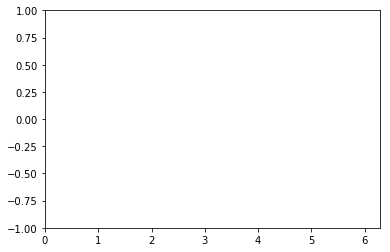

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()
